In [14]:
import pandas as pd

df = pd.read_csv("../data/processed/world_bank_processed.csv")
df.head()



,country,year,gdp_per_capita,life_expectancy,infant_mortality,health_spending,smoking_rate,birth_rate
0,ABW,1990,12187.536361,72.546,NaN,NaN,NaN,18.167
1,ABW,1991,13233.990517,72.592,NaN,NaN,NaN,17.545
2,ABW,1992,13892.605143,72.717,NaN,NaN,NaN,18.723
3,ABW,1993,14700.959808,72.777,NaN,NaN,NaN,18.145
4,ABW,1994,16055.287787,72.796,NaN,NaN,NaN,16.947


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9044 entries, 0 to 9043
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           9044 non-null   object 
 1   year              9044 non-null   int64  
 2   gdp_per_capita    8635 non-null   float64
 3   life_expectancy   9010 non-null   float64
 4   infant_mortality  8296 non-null   float64
 5   health_spending   5461 non-null   float64
 6   smoking_rate      1688 non-null   float64
 7   birth_rate        9010 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 565.4+ KB


In [16]:
df.describe()


,year,gdp_per_capita,life_expectancy,infant_mortality,health_spending,smoking_rate,birth_rate
count,9044.000000,8635.000000,9010.000000,8296.000000,5461.000000,1688.000000,9010.000000
mean,2006.500000,12421.172847,69.073544,33.891133,931.048113,23.954180,22.998214
std,9.811251,20897.589336,9.223161,30.624706,1673.497128,10.618327,11.396363
min,1990.000000,22.952133,12.158000,1.400000,4.175786,3.300000,4.400000
25%,1998.000000,1140.884624,63.591250,9.500000,63.557823,15.400000,12.900000
50%,2006.500000,3807.838692,70.883463,23.231961,247.411087,23.600000,20.667895
75%,2015.000000,14856.134892,75.897500,50.600000,807.130005,30.900000,31.737508
max,2023.000000,256580.515123,86.372000,274.000000,12434.433594,68.000000,55.093000


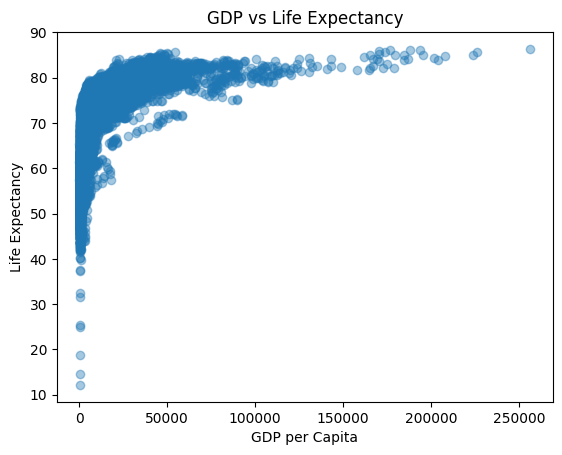

In [17]:
df_clean = df.dropna(subset=["gdp_per_capita", "life_expectancy"])

plt.scatter(df_clean["gdp_per_capita"], df_clean["life_expectancy"], alpha=0.4)
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("GDP vs Life Expectancy")
plt.show()



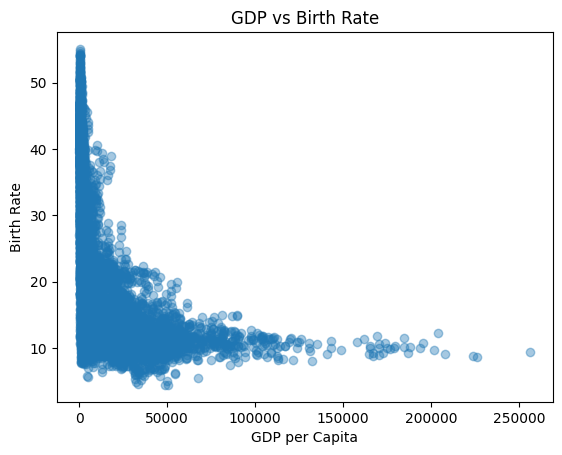

In [18]:
df_clean = df.dropna(subset=["gdp_per_capita", "birth_rate"])

plt.scatter(df_clean["gdp_per_capita"], df_clean["birth_rate"], alpha=0.4)
plt.xlabel("GDP per Capita")
plt.ylabel("Birth Rate")
plt.title("GDP vs Birth Rate")
plt.show()


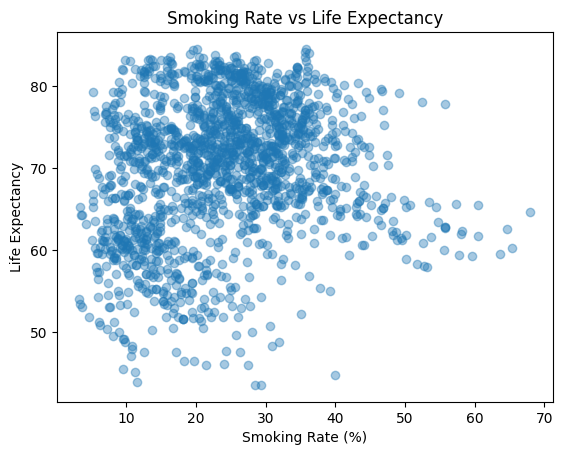

In [19]:
df_clean = df.dropna(subset=["smoking_rate", "life_expectancy"])

plt.scatter(df_clean["smoking_rate"], df_clean["life_expectancy"], alpha=0.4)
plt.xlabel("Smoking Rate (%)")
plt.ylabel("Life Expectancy")
plt.title("Smoking Rate vs Life Expectancy")
plt.show()


In [21]:
correlations = {
    "GDP vs Life Expectancy": df[['gdp_per_capita','life_expectancy']].corr().iloc[0,1],
    "Smoking Rate vs Life Expectancy": df[['smoking_rate','life_expectancy']].corr().iloc[0,1],
    "Smoking Rate vs GDP per capita": df[['smoking_rate','gdp_per_capita']].corr().iloc[0,1],
    "Health Spending vs Life Expectancy": df[['health_spending','life_expectancy']].corr().iloc[0,1],
    "Birth Rate vs GDP per capita": df[['birth_rate','gdp_per_capita']].corr().iloc[0,1],
}

correlations


{'GDP vs Life Expectancy': np.float64(0.5749672350717554),
 'Smoking Rate vs Life Expectancy': np.float64(0.17568142164262324),
 'Smoking Rate vs GDP per capita': np.float64(0.015430891369329933),
 'Health Spending vs Life Expectancy': np.float64(0.580537088244645),
 'Birth Rate vs GDP per capita': np.float64(-0.4980210188049799)}

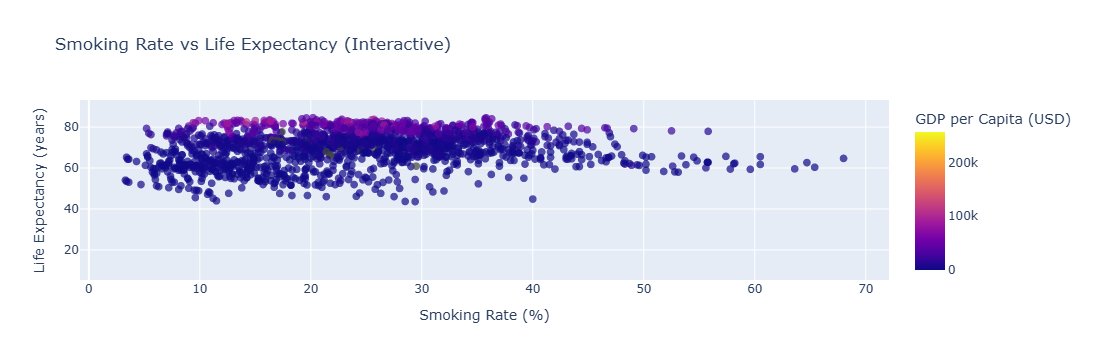

In [22]:
import plotly.express as px

fig = px.scatter(
    df,
    x="smoking_rate",
    y="life_expectancy",
    color="gdp_per_capita",
    hover_name="country",
    title="Smoking Rate vs Life Expectancy (Interactive)",
    labels={
        "smoking_rate": "Smoking Rate (%)",
        "life_expectancy": "Life Expectancy (years)",
        "gdp_per_capita": "GDP per Capita (USD)"
    },
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()


In [25]:
!pip install plotly



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
!pip install statsmodels



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


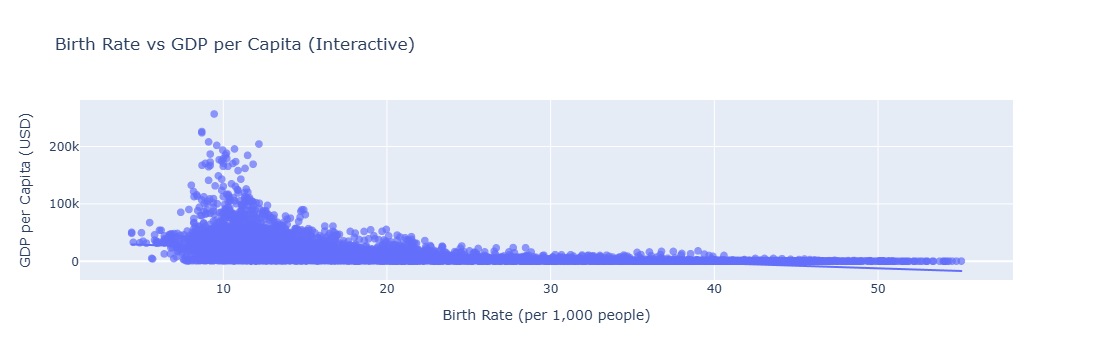

In [29]:
import plotly.express as px

fig = px.scatter(
    df,
    x="birth_rate",
    y="gdp_per_capita",
    hover_name="country",
    trendline="ols",
    title="Birth Rate vs GDP per Capita (Interactive)",
    labels={
        "birth_rate": "Birth Rate (per 1,000 people)",
        "gdp_per_capita": "GDP per Capita (USD)"
    },
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()


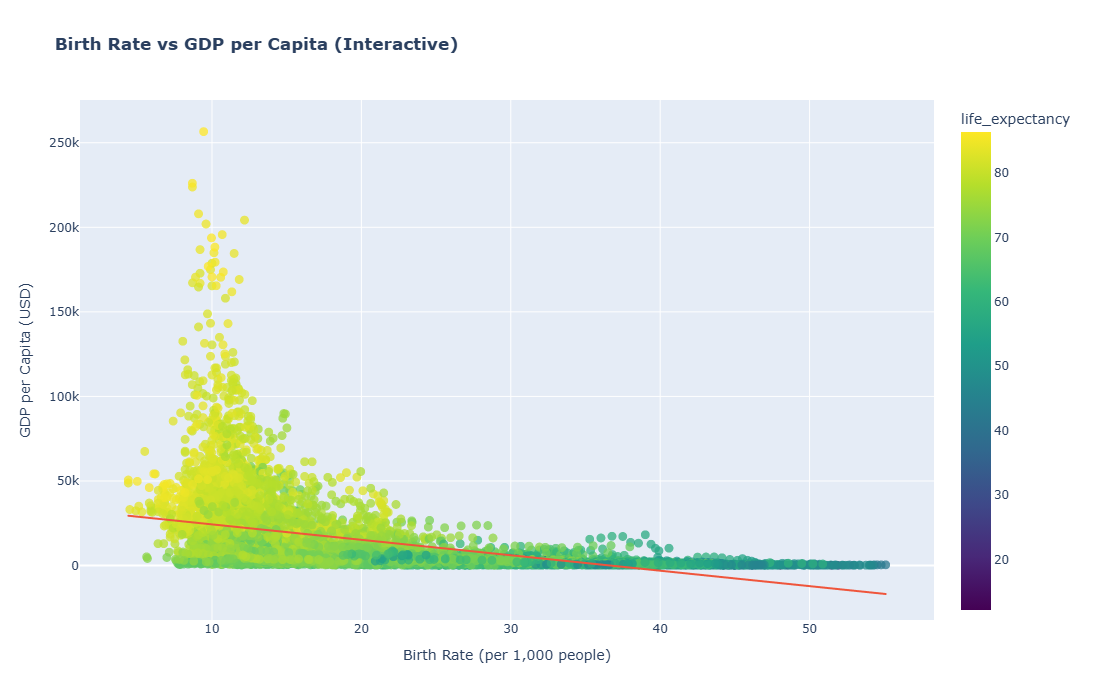

In [30]:
import plotly.express as px

fig = px.scatter(
    df,
    x="birth_rate",
    y="gdp_per_capita",
    hover_name="country",
    trendline="ols",
    title="<b>Birth Rate vs GDP per Capita (Interactive)</b>",
    labels={
        "birth_rate": "Birth Rate (per 1,000 people)",
        "gdp_per_capita": "GDP per Capita (USD)"
    },
    color="life_expectancy",          # extra dimension!
    color_continuous_scale="Viridis", # better colors
    height=700,
    width=950
)

fig.update_traces(marker=dict(size=9, opacity=0.75))
fig.show()


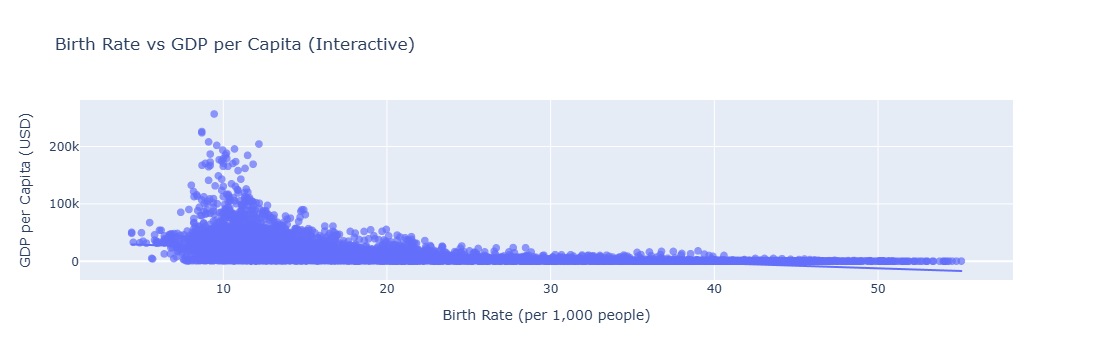

In [35]:
import plotly.express as px

fig = px.scatter(
    df,
    x="birth_rate",
    y="gdp_per_capita",
    hover_name="country",
    trendline="ols",
    title="Birth Rate vs GDP per Capita (Interactive)",
    labels={
        "birth_rate": "Birth Rate (per 1,000 people)",
        "gdp_per_capita": "GDP per Capita (USD)"
    }
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()


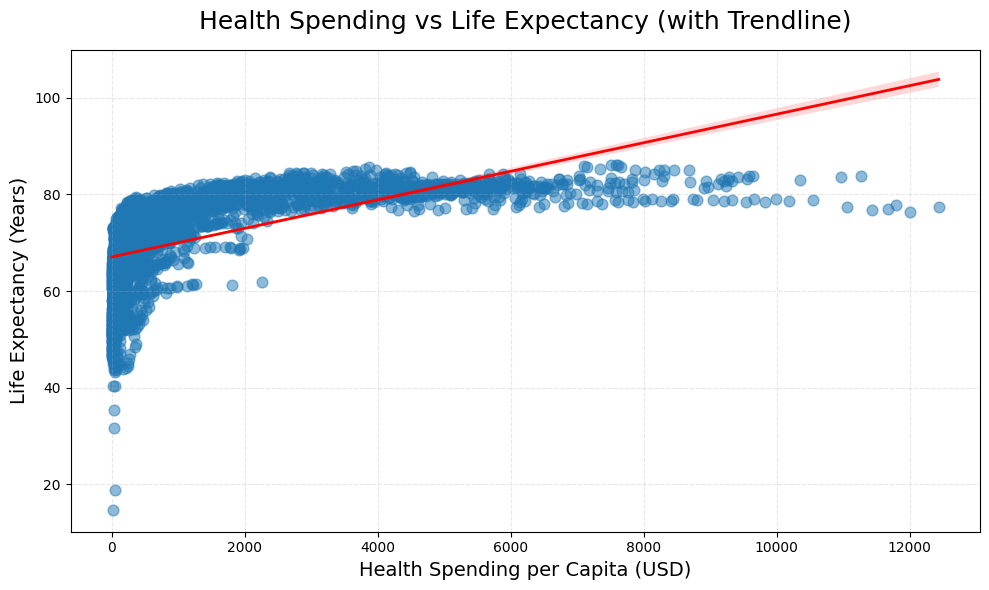

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.regplot(
    data=df,
    x="health_spending",
    y="life_expectancy",
    scatter_kws={'alpha':0.5, 's':60},
    line_kws={'color':'red', 'linewidth':2}
)

plt.title("Health Spending vs Life Expectancy (with Trendline)", fontsize=18, pad=15)
plt.xlabel("Health Spending per Capita (USD)", fontsize=14)
plt.ylabel("Life Expectancy (Years)", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
